---

# <center> ★ AI / ML Project - Kinematic Motion Detection ★
#### <center> ***Domain: Physics***

---

<img src="km.jpg" style="width: 600px;"/>

---

### Description:

Smartphones are getting intelligent day by day to assist Human's to aid in their day to day activites. A new feature has emerged popular in the fitness comunity that keeps an account of one's daily footsteps. 

More advanced versions include differentiating between detecting the difference between walking & run. This is achieved with the help of Sensors. Several such Sensorory data is recorded with IOS device & labelled as walking or running as 0 or 1. 

Currently, the dataset contains a single file which represents 88588 sensor data samples collected from accelerometer and gyroscope from iPhone 5c in 10 seconds interval and ~5.4/second frequency. This data is represented by following columns (each column contains sensor data for one of the sensor's axes):

* acceleration_x
* acceleration_y
* acceleration_z
* gyro_x
* gyro_y
* gyro_z

There is an activity type represented by "activity" column which acts as label and reflects following activities:
* "0": walking
* "1": running

Apart of that, the dataset contains "wrist" column which represents the wrist where the device was placed to collect a sample on:
* "0": left wrist
* "1": right wrist

Additionally, the dataset contains "date", "time" and "username" columns which provide information about the exact date, time and user which collected these measurements.

Can you build a strong classifier model to detect these so that it can be incorporated in the IOS device?

### Acknowledgements:
This dataset complements https://github.com/vmalyi/run-or-walk project which aims to detect whether the person is running or walking based on deep neural network and sensor data collected from iOS device.

This dataset has been accumulated with help of "Data Collection" iOS app specially developed for this purpose: https://github.com/vmalyi/run-or-walk/tree/master/ios_app_data_collection.

### Objective:
- Understand the Dataset & cleanup (if required).
- Build classification model to predict the type of Kinematic Motion.
- Also fine-tune the hyperparameters & compare the evaluation metrics of vaious classification algorithms.

---

## <center> Stractegic Plan of Action:

**We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:**
1. Data Exploration
2. Exploratory Data Analysis (EDA)
3. Data Pre-processing
4. Data Manipulation
5. Feature Selection/Extraction
6. Predictive Modelling
7. Project Outcomes & Conclusion

---

## <center>1. Data Exploration

In [1]:
#Importing the basic librarires

import os
import math
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from scipy.stats import randint
from scipy.stats import loguniform
from IPython.display import display

from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset

df = pd.read_csv('Kinematics_Data.csv')
df.drop(['username','time'],axis=1, inplace=True)

target = 'activity'
labels = ['Walking','Running']
features = [i for i in df.columns.values if i not in [target]]

original_df = df.copy(deep=True)
display(df.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,date,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922



Inference: The Datset consists of 9 features & 88588 samples.


In [3]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   wrist           88588 non-null  int64  
 2   activity        88588 non-null  int64  
 3   acceleration_x  88588 non-null  float64
 4   acceleration_y  88588 non-null  float64
 5   acceleration_z  88588 non-null  float64
 6   gyro_x          88588 non-null  float64
 7   gyro_y          88588 non-null  float64
 8   gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 6.1+ MB


In [4]:
#Checking number of unique rows in each feature

df.nunique()

date                 12
wrist                 2
activity              2
acceleration_x    30307
acceleration_y    23957
acceleration_z    19698
gyro_x            40988
gyro_y            38957
gyro_z            51296
dtype: int64

In [5]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=15:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 6 numerical & 2 categorical features.


In [6]:
#Checking the stats of all the columns

display(df.describe())

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


**Inference:** The stats seem to be fine, let us gain more undestanding by visualising the dataset.

---

## <center> 2. Exploratory Data Analysis (EDA)

            Target Variable Distribution           


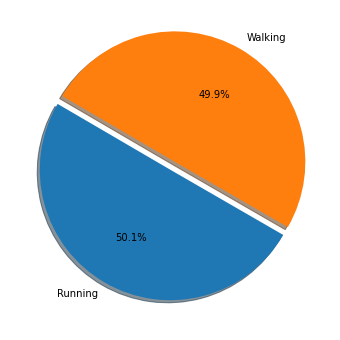

In [74]:
#Let us first analyze the distribution of the target variable

MAP={}
for e, i in enumerate(df[target].unique()):
    MAP[i]=labels[e]
df1 = df.copy()
df1[target]=df1[target].map(MAP)
explode=np.zeros(len(labels))
explode[-1]=0.07
print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(df1[target].value_counts(), labels=df1[target].value_counts().index, counterclock=False, shadow=True, 
        explode=explode, autopct='%1.1f%%', radius=1, startangle=-30)
plt.show()

**Inference:** The Target Variable seems to be slightly imbalanced! Hence data augmentation is not required.

                               Visualising Categorical Features:                                


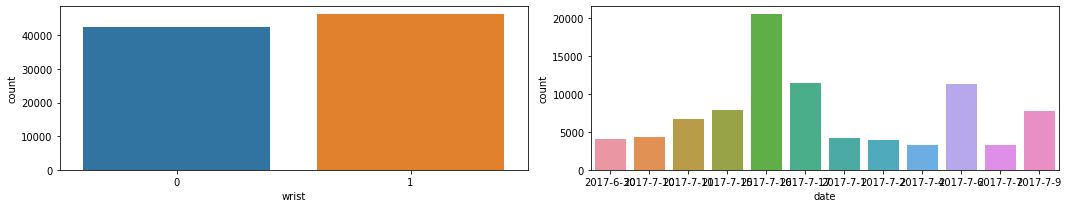

In [75]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

n=3
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    #plt.subplot(math.ceil(len(cf)/n),2,i+1)
    #sns.countplot(df[cf[i]])
    if df[cf[i]].nunique()<=4:
        plt.subplot(math.ceil(len(cf)/n),2,i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.subplot(math.ceil(len(cf)/2),2,i+1)
        sns.countplot(df[cf[i]])
plt.tight_layout()
plt.show()

**Inference:** There are no categorical features to visualize.

                                     Features Distribution                                      


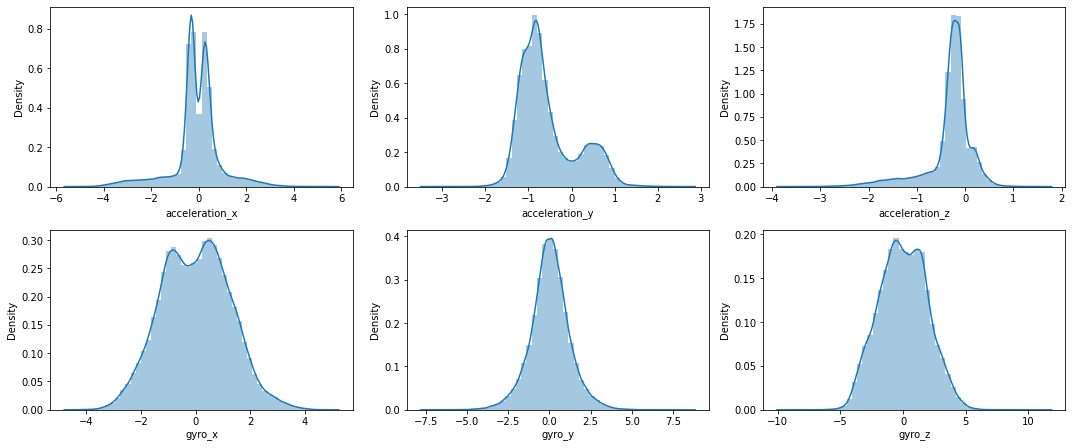

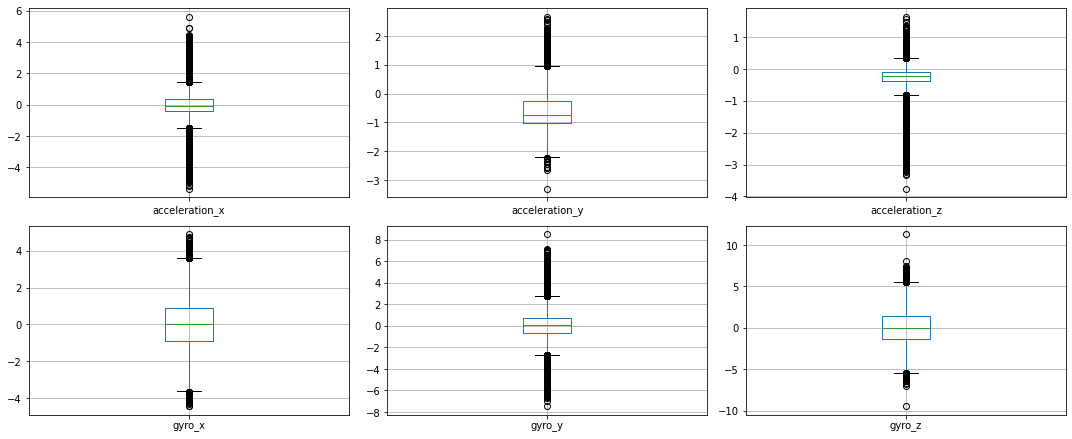

In [41]:
#Understanding the feature set

print('\033[1mFeatures Distribution'.center(100))

nf = [i for i in features if i not in cf]

plt.figure(figsize=[15,3*math.ceil(len(features)/3)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/3),3,c+1)
    sns.distplot(df[nf[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(features)/3)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/3),3,c+1)
    df.boxplot(nf[c])
plt.tight_layout()
plt.show()

**Inference:** The data is somewhat normally distributed. And there are many outliers present in the dataset. We shall fix these outliers..

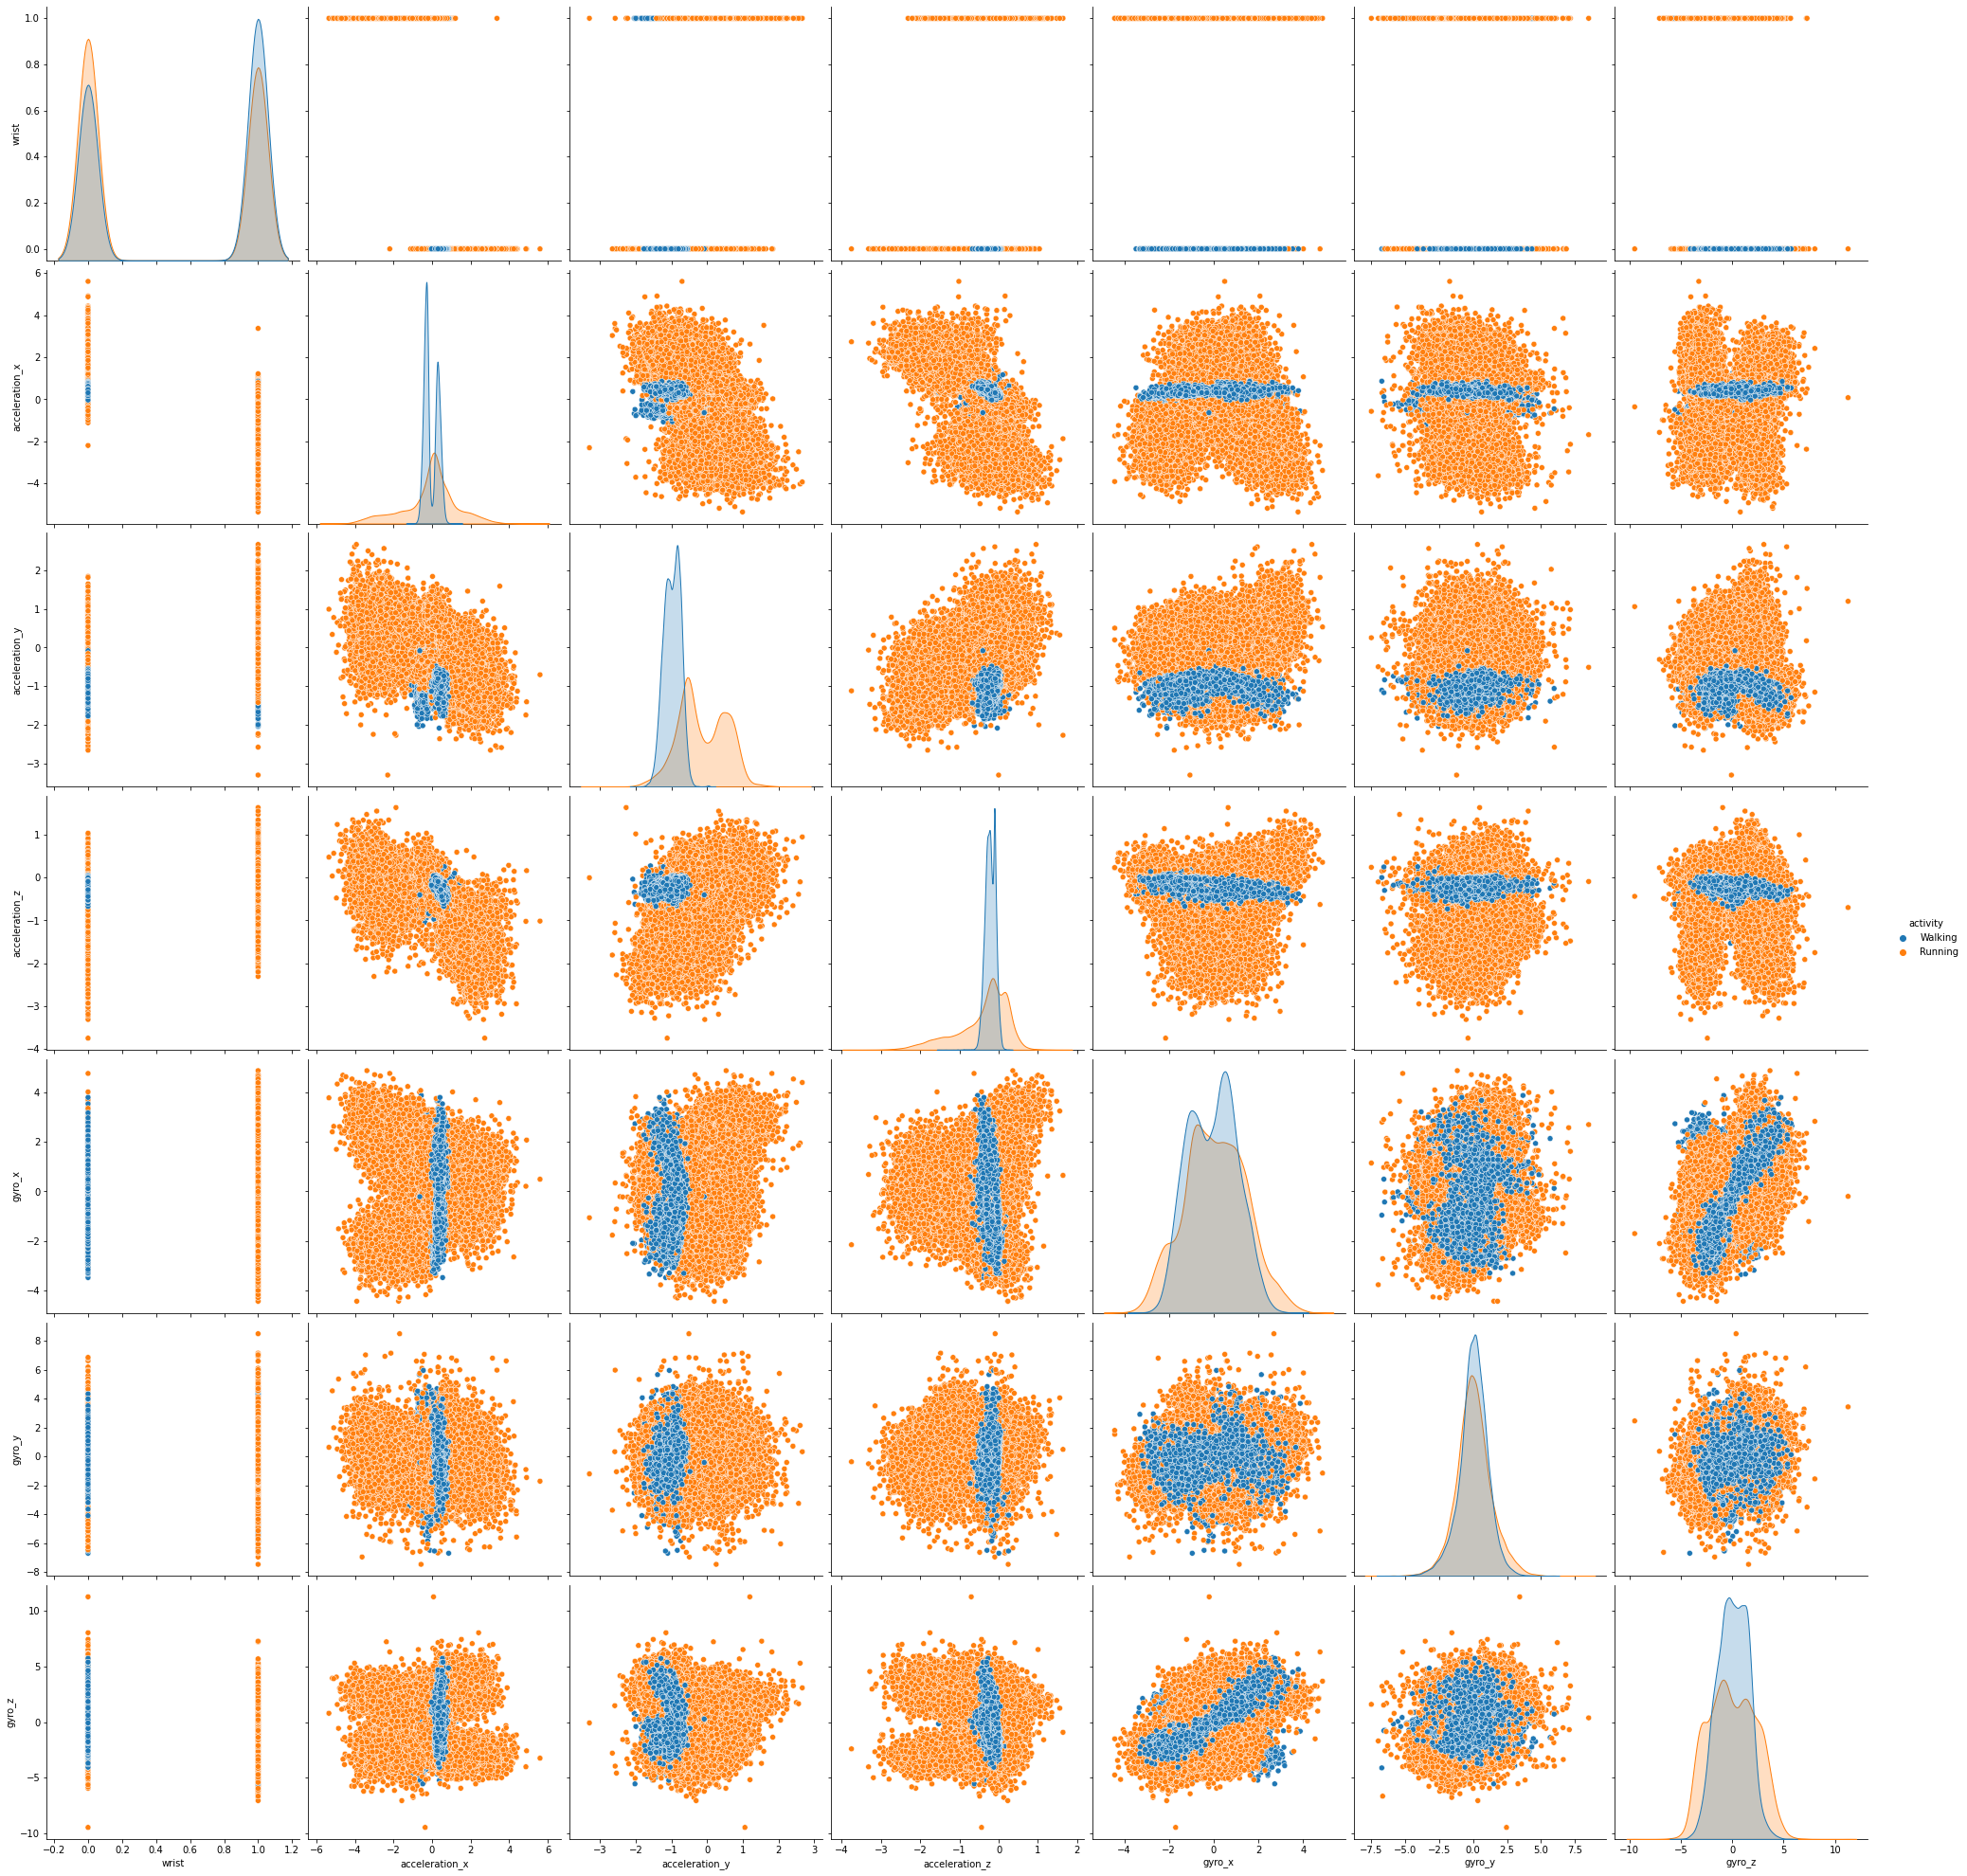

In [43]:
#Understanding the relationship between all the features

g=sns.pairplot(df1, hue=target, size=4)
#g.map_upper(sns.kdeplot, levels=1, color=".2")
plt.show()

**Inference:** The data samples of most of the features do show some patterns. Also they seem
to have lot of overlap for the outcome classes, making it difficult to be distingusihable. 
Let is proceed to perform cleanup on the data to remove the irregularities...

---

## <center> 3. Data Preprocessing

In [7]:
#Check for empty elements

print(df.isnull().sum())
print('\n\033[1mInference:\033[0m The dataset doesn\'t have any null elements')

date              0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

Inference: The dataset doesn't have any null elements


In [8]:
#Removal of any Duplicate rows (if any)

counter = 0
r,c = original_df.shape

df1 = df.drop_duplicates()
df1.reset_index(drop=True,inplace=True)

if df1.shape==(r,c):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped ---> {r-df1.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [9]:
#Removal of outlier:

df2 = df1.copy()

for i in [i for i in features if i not in 'date']:
    if df2[i].nunique()>=12:
        Q1 = df2[i].quantile(0.25)
        Q3 = df2[i].quantile(0.75)
        IQR = Q3 - Q1
        df2 = df2[df2[i] <= (Q3+(1.5*IQR))]
        df2 = df2[df2[i] >= (Q1-(1.5*IQR))]
df2 = df2.reset_index(drop=True)
display(df2.head())
print('\n\033[1mInference:\033[0m Before removal of outliers, The dataset had {} samples.'.format(df1.shape[0]))
print('\033[1mInference:\033[0m After removal of outliers, The dataset now has {} samples.'.format(df2.shape[0]))

,date,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922



Inference: Before removal of outliers, The dataset had 88588 samples.
Inference: After removal of outliers, The dataset now has 59268 samples.


In [10]:
#Converting categorical Columns to Numeric

df3 = df2.copy()

#Target Variable
MAP={}
for i,e in enumerate(df3[target].unique()):
    MAP[e]=i
df3[target]=df3[target].map(MAP)
print('Mapping Target variable --->',MAP)

#One-Hot Binay Encoding
oh=True
dm=True
for i in cf:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("One-Hot Encoding on features:")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df2[i].nunique()<15):
        if dm==True: print("\nDummy Encoding on features:")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
        

    

Mapping Target variable ---> {0: 0, 1: 1}
One-Hot Encoding on features:
wrist

Dummy Encoding on features:
date


In [11]:
#Fixing the imbalance using SMOTE Technique

df4 = df3.copy()

print('Original class distribution:')
print(df4[target].value_counts())

xf = df4.columns
X = df4.drop([target],axis=1)
Y = df4[target]

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

df5 = pd.DataFrame(X, columns=xf)
df5[target] = Y

print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())

Original class distribution:
0    42656
1    16612
Name: activity, dtype: int64

Class distribution after applying SMOTE Technique:
0    42656
1    42656
Name: activity, dtype: int64


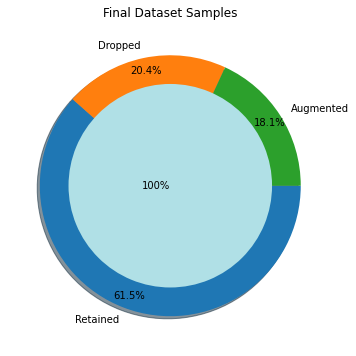


Inference:The final dataset after cleanup has 88588 samples & 9 rows.


In [12]:
#Final Dataset size after performing Preprocessing

plt.title('Final Dataset Samples')
plt.pie([df.shape[0], original_df.shape[0]-df4.shape[0], df5.shape[0]-df4.shape[0]], radius = 1, shadow=True,
        labels=['Retained','Dropped','Augmented'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0,0])
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])
plt.show()

print('\n\033[1mInference:\033[0mThe final dataset after cleanup has {} samples & {} rows.'.format(df.shape[0], df.shape[1]))

---

## <center> 4. Data Manipulation

In [13]:
#Splitting the data intro training & testing sets

df = df5.copy()

X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (85312, 18) (85312,) 
Training set  --->  (68249, 18) (68249,) 
Testing set   --->  (17063, 18)  (17063,)


In [14]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(100))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                               Standardardization on Training set                               


,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,date_2017-7-1,date_2017-7-10,date_2017-7-11,date_2017-7-15,date_2017-7-16,date_2017-7-17,date_2017-7-2,date_2017-7-4,date_2017-7-6,date_2017-7-7,date_2017-7-9
count,6.824900e+04,6.824900e+04,6.824900e+04,6.824900e+04,6.824900e+04,6.824900e+04,6.824900e+04,6.824900e+04,6.824900e+04,6.824900e+04,6.824900e+04,6.824900e+04,6.824900e+04,6.824900e+04,6.824900e+04,6.824900e+04,6.824900e+04,6.824900e+04
mean,-9.775962e-17,1.946864e-17,-2.810979e-17,4.497567e-17,-2.915090e-18,1.426312e-17,1.218091e-17,-4.976475e-17,-4.523595e-17,-1.741246e-17,3.206599e-17,-3.852083e-18,-8.620337e-17,-1.686588e-17,6.215388e-17,-4.820309e-17,5.861413e-17,-2.915090e-17
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-1.116274e+00,-3.183247e+00,-2.661876e+00,-2.551029e+00,-3.105341e+00,-2.715348e+00,-2.592566e+00,-2.298948e-01,-2.246541e-01,-3.149519e-01,-3.381183e-01,-5.477956e-01,-3.950409e-01,-2.042036e-01,-1.643978e-01,-3.577561e-01,-1.981719e-01,-2.883795e-01
25%,-1.116274e+00,-6.413848e-01,-7.144891e-01,-6.673649e-01,-7.855337e-01,-6.363147e-01,-6.998165e-01,-2.298948e-01,-2.246541e-01,-3.149519e-01,-3.381183e-01,-5.477956e-01,-3.950409e-01,-2.042036e-01,-1.643978e-01,-3.577561e-01,-1.981719e-01,-2.883795e-01
50%,8.958375e-01,4.606083e-02,-2.021218e-01,-6.889750e-02,1.073108e-01,-7.057867e-03,-4.512023e-02,-2.298948e-01,-2.246541e-01,-3.149519e-01,-3.381183e-01,-5.477956e-01,-3.950409e-01,-2.042036e-01,-1.643978e-01,-3.577561e-01,-1.981719e-01,-2.883795e-01
75%,8.958375e-01,7.601344e-01,4.050921e-01,6.552075e-01,7.714987e-01,6.515102e-01,6.992812e-01,-2.298948e-01,-2.246541e-01,-3.149519e-01,-3.381183e-01,-5.477956e-01,-3.950409e-01,-2.042036e-01,-1.643978e-01,-3.577561e-01,-1.981719e-01,-2.883795e-01
max,8.958375e-01,3.357472e+00,2.290486e+00,2.054333e+00,2.927833e+00,2.804611e+00,2.629338e+00,4.349816e+00,4.451288e+00,3.175088e+00,2.957545e+00,1.825498e+00,2.531383e+00,4.897074e+00,6.082808e+00,2.795200e+00,5.046123e+00,3.467653e+00



                                Standardardization on Testing set                                


,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,date_2017-7-1,date_2017-7-10,date_2017-7-11,date_2017-7-15,date_2017-7-16,date_2017-7-17,date_2017-7-2,date_2017-7-4,date_2017-7-6,date_2017-7-7,date_2017-7-9
count,17063.000000,17063.000000,17063.000000,17063.000000,17063.000000,17063.000000,17063.000000,17063.000000,17063.000000,17063.000000,17063.000000,17063.000000,17063.000000,17063.000000,17063.000000,17063.000000,17063.000000,17063.000000
mean,-0.022543,0.006590,0.004404,-0.011735,0.015888,0.012717,0.006282,0.007102,-0.010629,0.001265,-0.003202,-0.010352,-0.015153,0.011053,0.008048,0.015137,0.000990,0.012094
std,1.002257,0.999918,1.005290,0.998594,0.999232,1.000170,1.007316,1.014530,0.977250,1.001835,0.995822,0.993340,0.983593,1.025577,1.023536,1.018197,1.002426,1.019002
min,-1.116274,-3.179475,-2.349371,-2.550128,-3.092048,-2.715794,-2.583948,-0.229895,-0.224654,-0.314952,-0.338118,-0.547796,-0.395041,-0.204204,-0.164398,-0.357756,-0.198172,-0.288379
25%,-1.116274,-0.636281,-0.718987,-0.679523,-0.765940,-0.623259,-0.694932,-0.229895,-0.224654,-0.314952,-0.338118,-0.547796,-0.395041,-0.204204,-0.164398,-0.357756,-0.198172,-0.288379
50%,0.895838,0.071554,-0.204551,-0.075652,0.126922,0.004184,-0.041305,-0.229895,-0.224654,-0.314952,-0.338118,-0.547796,-0.395041,-0.204204,-0.164398,-0.357756,-0.198172,-0.288379
75%,0.895838,0.765238,0.421030,0.636255,0.780699,0.656757,0.694461,-0.229895,-0.224654,-0.314952,-0.338118,-0.547796,-0.395041,-0.204204,-0.164398,-0.357756,-0.198172,-0.288379
max,0.895838,3.245856,2.290291,2.054333,2.936033,2.804611,2.630155,4.349816,4.451288,3.175088,2.957545,1.825498,2.531383,4.897074,6.082808,2.795200,5.046123,3.467653


---

## <center> 5. Feature Selection/Extraction

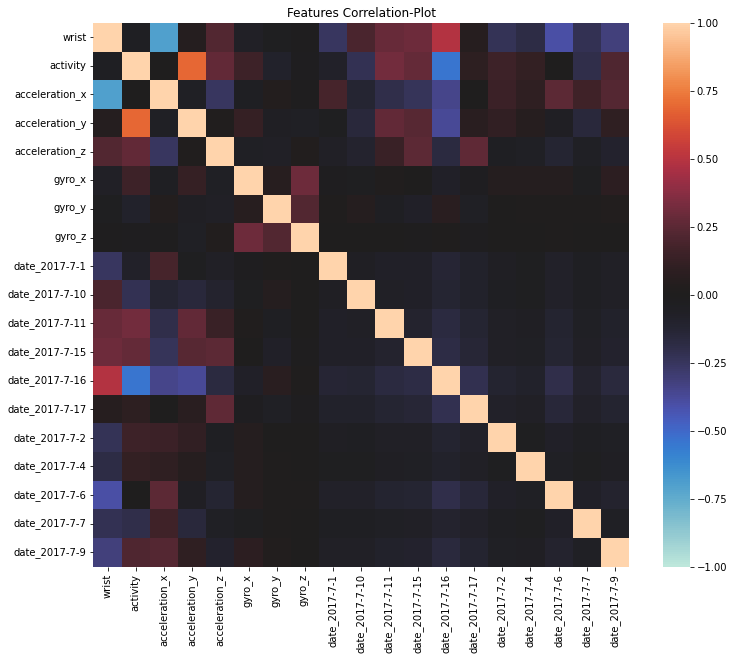

In [15]:
#Checking the correlation

features = df.columns
plt.figure(figsize=[12,10])
plt.title('Features Correlation-Plot')
sns.heatmap(df[features].corr(), vmin=-1, vmax=1, center=0) #, annot=True
plt.show()

**Inference:** \
Correlation plt between the variables convey lot of information about the realationship betweem them. The features do not have strong multi-collinearity between them like those of charges with age & smoking. Hence we shall perform Feature Selection/Extraction steps to take care of these multi-collinearity...

**Strategy:** \
We can fix these multicollinearity with two techniques:
1. Manual Method - Variance Inflation Factor (VIF)
2. Automatic Method - Recursive Feature Elimination (RFE)

## 5a. Manual Method - VIF

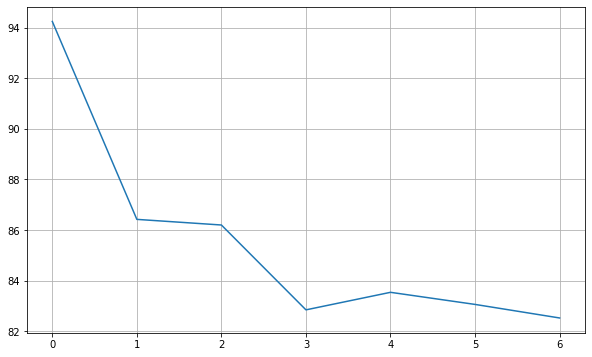

In [103]:
# Calculate the VIFs to remove multicollinearity

DROP=[]; scores=[]
#scores.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std, Train_Y).predict(Test_X_std)))

for i in range(len(X.columns.values)-10):
    vif = pd.DataFrame()
    Xs = X.drop(DROP,axis=1)
    #print(DROP)
    vif['Features'] = Xs.columns
    vif['VIF'] = [variance_inflation_factor(Xs.values, i) for i in range(Xs.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    DROP.append(vif.Features[0])
    if vif.VIF[0]>0.5:
        scores.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std.drop(DROP,axis=1), Train_Y).predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
    #print(scores)
    
plt.plot(scores)
#plt.ylim([0.7,0.85])
plt.grid()
plt.show()

## 5b. Automatic Method - RFE

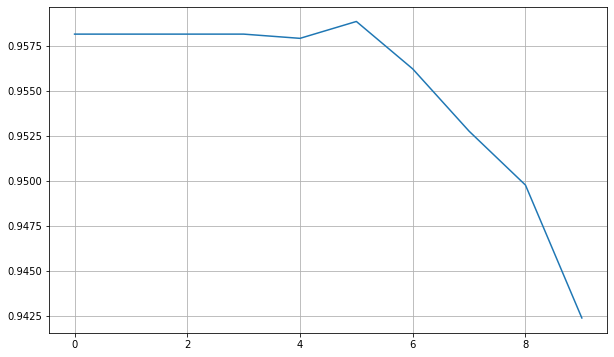

In [106]:
# Applying Recurrsive Feature Elimination

# Running RFE with the output number of the variable equal to 10
LR = LogisticRegression()#.fit(Train_X_std, Train_Y)
scores=[]

for i in range(10):
    rfe = RFE(LR,n_features_to_select=len(Train_X_std.columns)-i)   
    rfe = rfe.fit(Train_X_std, Train_Y)
    scores.append(f1_score(Test_Y,LR.fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]), average='weighted'))
    #print(scores)
    
plt.plot(scores)
#plt.ylim([0.80,0.84])
plt.grid()
plt.show()

**Inference:** In both VIF & RFE Techniques, we can notice better scores upon dropping some multicollinear features. While the scores of VIF technique decline wrt to each feature drop, the RFE technique can increase the F2-score for dropping 2 features. Hence we shall use the features shortlisted by RFE Technique.

In [108]:
# from sklearn.decomposition import PCA

# pca = PCA().fit(Train_X_std)

# fig, ax = plt.subplots(figsize=(8,6))
# x_values = range(1, pca.n_components_+1)
# ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
# ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
# plt.plot([0,pca.n_components_+1],[0.90,0.90],'g--')
# #plt.plot([10,10],[0,1],'g--')
# ax.set_title('Explained variance of components')
# ax.set_xlabel('Principal Component')
# ax.set_ylabel('Explained Variance')
# plt.grid()
# plt.legend()
# plt.show()

**Inference:** We shall avoid performing dimensionality reduction for the current problem.

In [109]:
# #Applying PCA Transformations

# pca = PCA(n_components=7)

# Train_X_std_pca = pca.fit_transform(Train_X_std)
# print('The shape of final transformed training feature set:')
# print(Train_X_std_pca.shape)
# Train_X_std_pca = pd.DataFrame(Train_X_std_pca)

# Test_X_std_pca = pca.transform(Test_X_std)
# print('\nThe shape of final transformed testing feature set:')
# print(Test_X_std_pca.shape)
# Test_X_std_pca = pd.DataFrame(Test_X_std_pca)

# Train_X_std = Train_X_std_pca
# Test_X_std = Test_X_std_pca

In [15]:
#Filtering the necessary columns

LR = LogisticRegression()
rfe = RFE(LR,n_features_to_select=len(Train_X_std.columns)-4)   
rfe = rfe.fit(Train_X_std, Train_Y)
Train_X_std=Train_X_std.loc[:,rfe.support_]
Test_X_std=Test_X_std.loc[:,rfe.support_]

---

## <center> 6. Predictive Modeling

In [16]:
#Let us create first create a table to store the results of various models 

Evaluation_Results = pd.DataFrame(np.zeros((8,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])
Evaluation_Results.index=['Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)','Naïve Bayes Classifier (NB)',
                         'Support Vector Machine (SVM)','K Nearest Neighbours (KNN)', 'Gradient Boosting (GB)','Extreme Gradient Boosting (XGB)']
Evaluation_Results

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Logistic Regression (LR),0.0,0.0,0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0,0.0,0.0
Naïve Bayes Classifier (NB),0.0,0.0,0.0,0.0,0.0
Support Vector Machine (SVM),0.0,0.0,0.0,0.0,0.0
K Nearest Neighbours (KNN),0.0,0.0,0.0,0.0,0.0
Gradient Boosting (GB),0.0,0.0,0.0,0.0,0.0
Extreme Gradient Boosting (XGB),0.0,0.0,0.0,0.0,0.0


In [17]:
#Let us define functions to summarise the Prediction's scores .

#Classification Summary Function
def Classification_Summary(pred,pred_prob,i):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(Test_Y, pred),3)*100   
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(Test_Y, pred),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['Recall']=round(recall_score(Test_Y, pred),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(Test_Y, pred),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['AUC-ROC score']=round(roc_auc_score(Test_Y, pred_prob[:, 1]),3)*100 #, multi_class='ovr'
    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred),3)*100)) #, average='weighted'
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Test_Y, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(Test_Y, pred))
    
    auc_roc(Test_Y, pred_prob, curves=['each_class'])
    plt.show()

#Visualising Function
def AUC_ROC_plot(Test_Y, pred):    
    ref = [0 for _ in range(len(Test_Y))]
    ref_auc = roc_auc_score(Test_Y, ref)
    lr_auc = roc_auc_score(Test_Y, pred)

    ns_fpr, ns_tpr, _ = roc_curve(Test_Y, ref)
    lr_fpr, lr_tpr, _ = roc_curve(Test_Y, pred)

    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='AUC = {}'.format(round(roc_auc_score(Test_Y, pred)*100,2))) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

---

## 1. Logistic Regression:

<<<----------------------------------- Evaluating Logistic Regression (LR) ----------------------------------->>>

Accuracy = 95.8%
F1 Score = 95.8%

 Confusiton Matrix:
 [[8085  431]
 [ 290 8257]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      8516
           1       0.95      0.97      0.96      8547

    accuracy                           0.96     17063
   macro avg       0.96      0.96      0.96     17063
weighted avg       0.96      0.96      0.96     17063



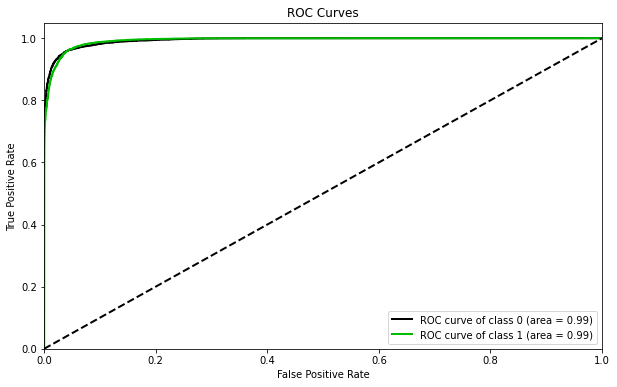


Interpreting the Output of Logistic Regression:

intercept  -1.139665453751662
classes [0 1]


,coeff
wrist,21.630535
acceleration_x,0.666661
acceleration_y,5.118564
gyro_x,0.225845
gyro_y,-0.529492
gyro_z,1.025701
date_2017-7-1,-0.446944
date_2017-7-10,-13.338351
date_2017-7-15,-12.470380
date_2017-7-16,-27.915374


In [20]:
# Building Logistic Regression Classifier

LR_model = LogisticRegression()

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(LR_model, space, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

LR = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = LR.predict(Test_X_std)
pred_prob = LR.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,0)

print('\n\033[1mInterpreting the Output of Logistic Regression:\n\033[0m')

print('intercept ', LR.intercept_[0])
print('classes', LR.classes_)
display(pd.DataFrame({'coeff': LR.coef_[0]}, index=Train_X_std.columns))

---

## 2. Decisoin Tree Classfier:

<<<----------------------------------- Evaluating Decision Tree Classifier (DT) ----------------------------------->>>

Accuracy = 98.7%
F1 Score = 98.7%

 Confusiton Matrix:
 [[8414  102]
 [ 117 8430]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8516
           1       0.99      0.99      0.99      8547

    accuracy                           0.99     17063
   macro avg       0.99      0.99      0.99     17063
weighted avg       0.99      0.99      0.99     17063



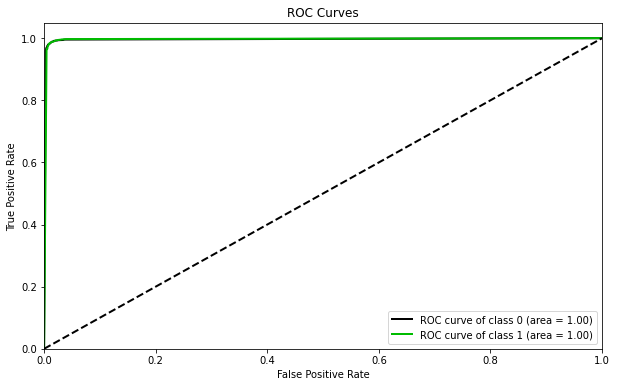


Interpreting the output of Decision Tree:



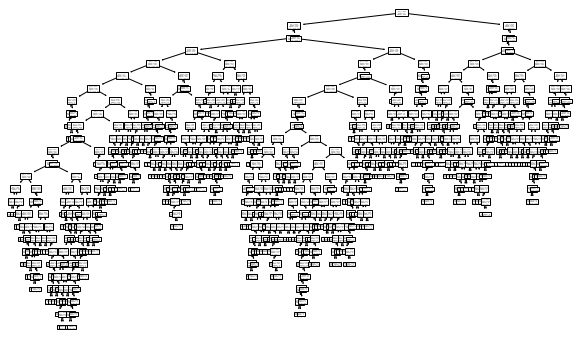

In [21]:
#Building Decision Tree Classifier

DT_model = DecisionTreeClassifier()

param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(DT_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

DT = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = DT.predict(Test_X_std)
pred_prob = DT.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,1)

print('\n\033[1mInterpreting the output of Decision Tree:\n\033[0m')
tree.plot_tree(DT)
plt.show()

---

## 3. Random Forest Classfier:

<<<----------------------------------- Evaluating Random Forest Classifier (RF) ----------------------------------->>>

Accuracy = 99.4%
F1 Score = 99.4%

 Confusiton Matrix:
 [[8454   62]
 [  40 8507]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      8516
           1       0.99      1.00      0.99      8547

    accuracy                           0.99     17063
   macro avg       0.99      0.99      0.99     17063
weighted avg       0.99      0.99      0.99     17063



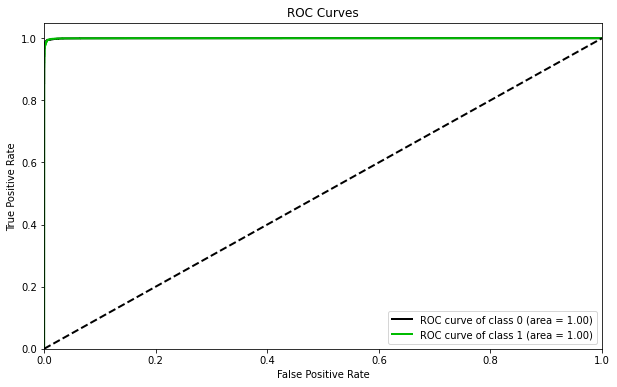


Interpreting the output of Random Forest:



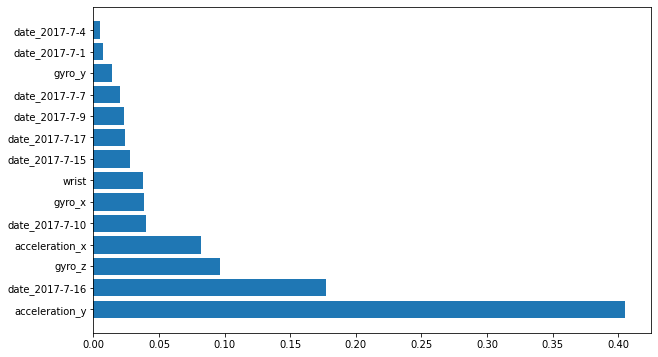

In [22]:
# Building Random-Forest Classifier

RF_model = RandomForestClassifier()

param_dist={'bootstrap': [True, False],
            'max_depth': [10, 20, 50, 100, None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [50, 100]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(RF_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

RF = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = RF.predict(Test_X_std)
pred_prob = RF.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,2)

print('\n\033[1mInterpreting the output of Random Forest:\n\033[0m')
rfi=pd.Series(RF.feature_importances_, index=Train_X_std.columns).sort_values(ascending=False)
plt.barh(rfi.index,rfi.values)
plt.show()

---

## 4. Naive Bayes Classfier:

<<<----------------------------------- Evaluating Naïve Bayes Classifier (NB) ----------------------------------->>>

Accuracy = 88.3%
F1 Score = 88.2%

 Confusiton Matrix:
 [[7629  887]
 [1103 7444]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88      8516
           1       0.89      0.87      0.88      8547

    accuracy                           0.88     17063
   macro avg       0.88      0.88      0.88     17063
weighted avg       0.88      0.88      0.88     17063



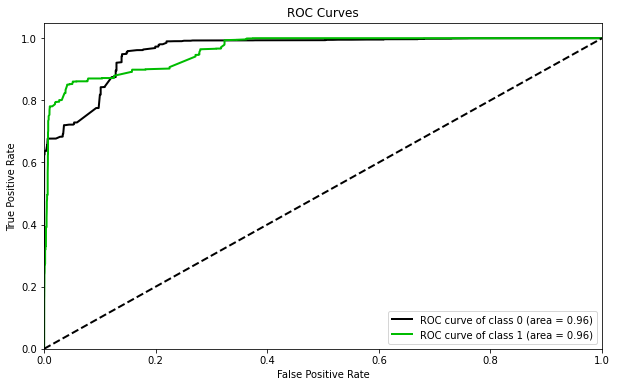

In [23]:
# Building Naive Bayes Classifier

NB_model = BernoulliNB()

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(NB_model, params, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

NB = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = NB.predict(Test_X_std)
pred_prob = NB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,3)

---

## 5. Support Vector Machine Classfier:

<<<----------------------------------- Evaluating Support Vector Machine (SVM) ----------------------------------->>>

Accuracy = 98.9%
F1 Score = 98.9%

 Confusiton Matrix:
 [[8401  115]
 [  72 8475]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8516
           1       0.99      0.99      0.99      8547

    accuracy                           0.99     17063
   macro avg       0.99      0.99      0.99     17063
weighted avg       0.99      0.99      0.99     17063



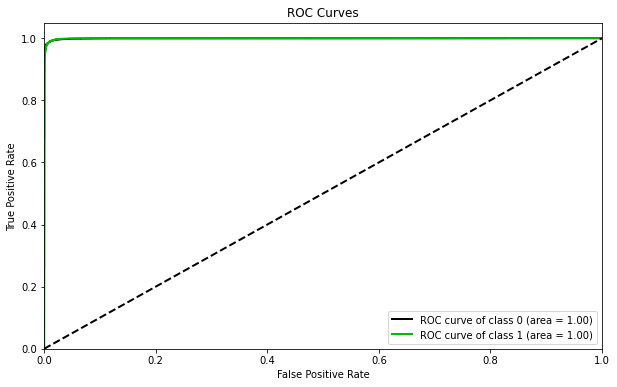

In [32]:
# Building Support Vector Machine Classifier

SVM_model = SVC(probability=True).fit(Train_X_std, Train_Y)

svm_param = {"C": [.01, .1, 1, 5, 10, 100],             
             "gamma": [.01, .1, 1, 5, 10, 100],
             "kernel": ["rbf"],
             "random_state": [1]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#RCV = RandomizedSearchCV(SVM_model, svm_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

#SVM = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = SVM.predict(Test_X_std)
pred_prob = SVM.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,4)

---

## 6. K-Nearest Neighbours Classfier:

<<<----------------------------------- Evaluating K Nearest Neighbours (KNN) ----------------------------------->>>

Accuracy = 99.4%
F1 Score = 99.4%

 Confusiton Matrix:
 [[8461   55]
 [  43 8504]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8516
           1       0.99      0.99      0.99      8547

    accuracy                           0.99     17063
   macro avg       0.99      0.99      0.99     17063
weighted avg       0.99      0.99      0.99     17063



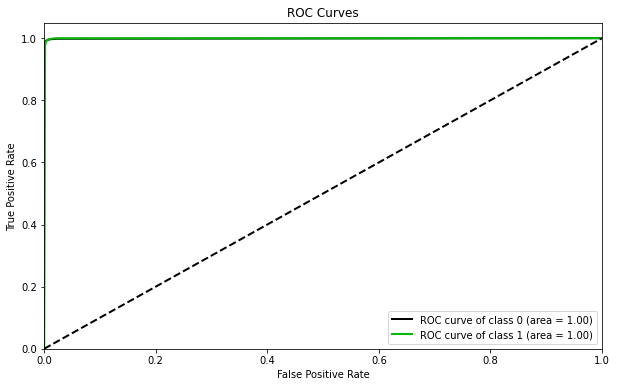

In [27]:
# Building K-Neareset Neighbours Classifier

KNN_model = KNeighborsClassifier()

knn_param = {"n_neighbors": [i for i in range(1,30,5)],
             "weights": ["uniform", "distance"],
             "algorithm": ["ball_tree", "kd_tree", "brute"],
             "leaf_size": [1, 10, 30],
             "p": [1,2]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#RCV = RandomizedSearchCV(KNN_model, knn_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

KNN = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = KNN.predict(Test_X_std)
pred_prob = KNN.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,5)

---

## 7. Gradient Boosting Classfier:

<<<----------------------------------- Evaluating Gradient Boosting (GB) ----------------------------------->>>

Accuracy = 98.2%
F1 Score = 98.2%

 Confusiton Matrix:
 [[8342  174]
 [ 141 8406]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      8516
           1       0.98      0.98      0.98      8547

    accuracy                           0.98     17063
   macro avg       0.98      0.98      0.98     17063
weighted avg       0.98      0.98      0.98     17063



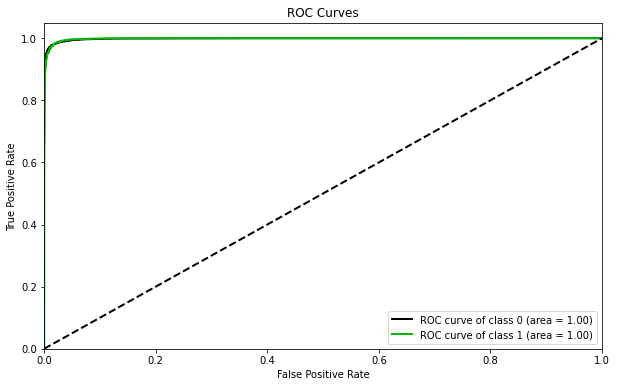

In [29]:
# Building Gradient Boosting Classifier

GB_model = GradientBoostingClassifier().fit(Train_X_std, Train_Y)
param_dist = {
    "n_estimators":[5,20,100,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(GB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

GB = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = GB.predict(Test_X_std)
pred_prob = GB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,6)

---

## 8. Extreme Gradient Boosting Classfier:

[01:44:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
<<<----------------------------------- Evaluating Extreme Gradient Boosting (XGB) ----------------------------------->>>

Accuracy = 99.4%
F1 Score = 99.4%

 Confusiton Matrix:
 [[8465   51]
 [  45 8502]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8516
           1       0.99      0.99      0.99      8547

    accuracy                           0.99     17063
   macro avg       0.99      0.99      0.99     17063
weighted avg       0.99      0.99      0.99     17063



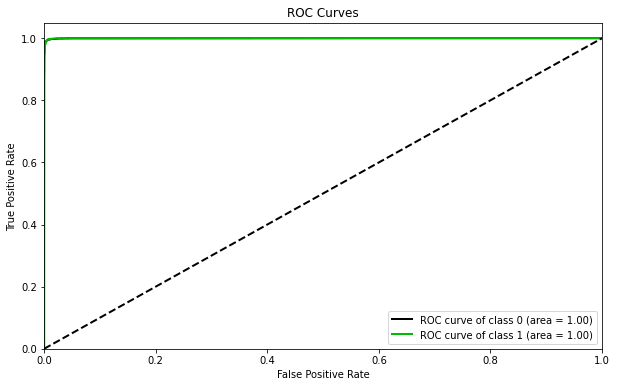

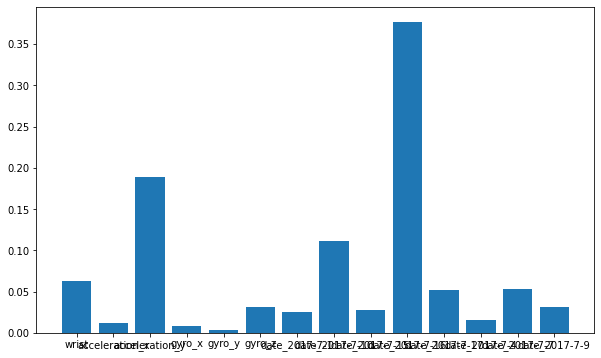

In [30]:
# Building Extreme Gradient Boosting Classifier

XGB_model = XGBClassifier().fit(Train_X_std, Train_Y)

param_dist = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(XGB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

XGB = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = XGB.predict(Test_X_std)
pred_prob = XGB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,7)

plt.bar( Train_X_std.columns,XGB.feature_importances_,)
plt.show()

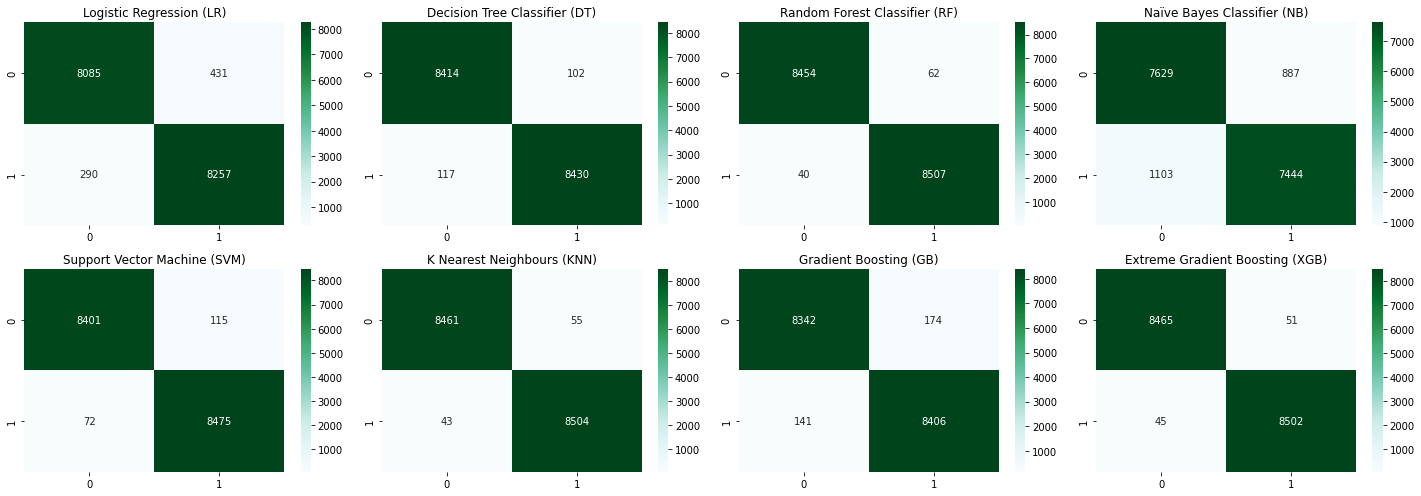

In [33]:
#Plotting Confusion-Matrix of all the predictive Models

def plot_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.columns=labels
    cm.index=labels
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    #fig, ax = plt.subplots()
    sns.heatmap(cm, annot=annot, fmt='')# cmap= "GnBu"
    
def conf_mat_plot(all_models):
    plt.figure(figsize=[20,3.5*math.ceil(len(all_models)*len(labels)/14)])
    
    for i in range(len(all_models)):
        if len(labels)<=4:
            plt.subplot(2,4,i+1)
        else:
            plt.subplot(math.ceil(len(all_models)/3),3,i+1)
        pred = all_models[i].predict(Test_X_std)
        #plot_cm(Test_Y, pred)
        sns.heatmap(confusion_matrix(Test_Y, pred), annot=True, cmap='BuGn', fmt='.0f') #vmin=0,vmax=5
        plt.title(Evaluation_Results.index[i])
    plt.tight_layout()
    plt.show()

conf_mat_plot([LR,DT,RF,NB,SVM,KNN,GB,XGB])

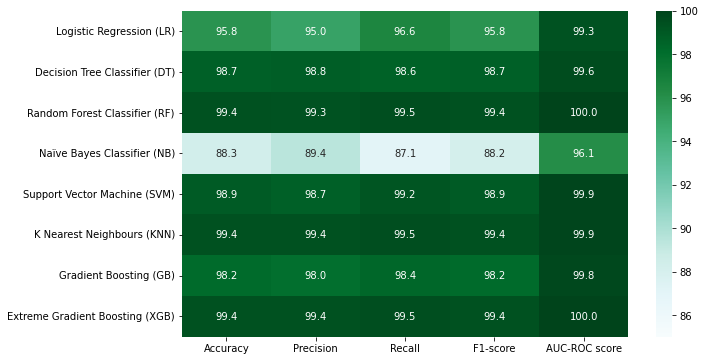

In [34]:
#Comparing all the models Scores

#plt.figure(figsize=[12,5])
sns.heatmap(Evaluation_Results, annot=True, vmin=85, vmax=100, cmap='BuGn', fmt='.1f')
plt.show()

**Insights:** For the current problem statement, it is more important to focus on the F1-score. Except Naive Bayes Classifier, most of the algorithms perform well...

---

## <center> 7. Project Outcomes & Conclusions

### Here are some of the key outcomes of the project:
- The Dataset was small totally around 88 thousand samples & after preprocessing 20.4% of the datasamples were dropped. 
- The samples were slightly imbalanced after processing, hence SMOTE Technique was applied on the data to  balance the classes, adding 18.1% more samples to the dataset.
- Visualising the distribution of data & their relationships, helped us to get some insights on the relationship between the featureset.
- Feature Selection/Eliminination was carried out and appropriate features were shortlisted.
- Testing multiple algorithms with fine-tuning hyperparamters gave us some understanding on the model performance for various algorithms on this specific dataset.
- Except Naive Baye's most of the algorithms performed wll on the current dataset, considering F1-score as the key-metric.
- Yet it wise to also consider simpler model like Logistic Regression as it is more generalisable & is computationally less expensive, but comes at the cost of slight misclassifications.

In [ ]:
<<<----------------------------------------------------------THE END----------------------------------------------------------------->>>